Shape: (200, 5)
   Exercise_Time_Min  Healthy_Meals_Per_Day  Sleep_Hours_Per_Night  \
0          34.967142                      5               7.618856   
1          28.617357                      8               4.105473   
2          36.476885                      4               6.024123   
3          45.230299                      1               8.565319   
4          27.658466                      3               8.301648   

   Stress_Level        BMI  
0             2  33.068556  
1             7  27.267672  
2             1  23.779217  
3             8  29.820436  
4             3  30.947352  
       Exercise_Time_Min  Healthy_Meals_Per_Day  Sleep_Hours_Per_Night  \
count         200.000000             200.000000             200.000000   
mean           29.592290               2.875000               6.933582   
std             9.310039               1.815449               1.422471   
min             3.802549               0.000000               1.778787   
25%            22.9

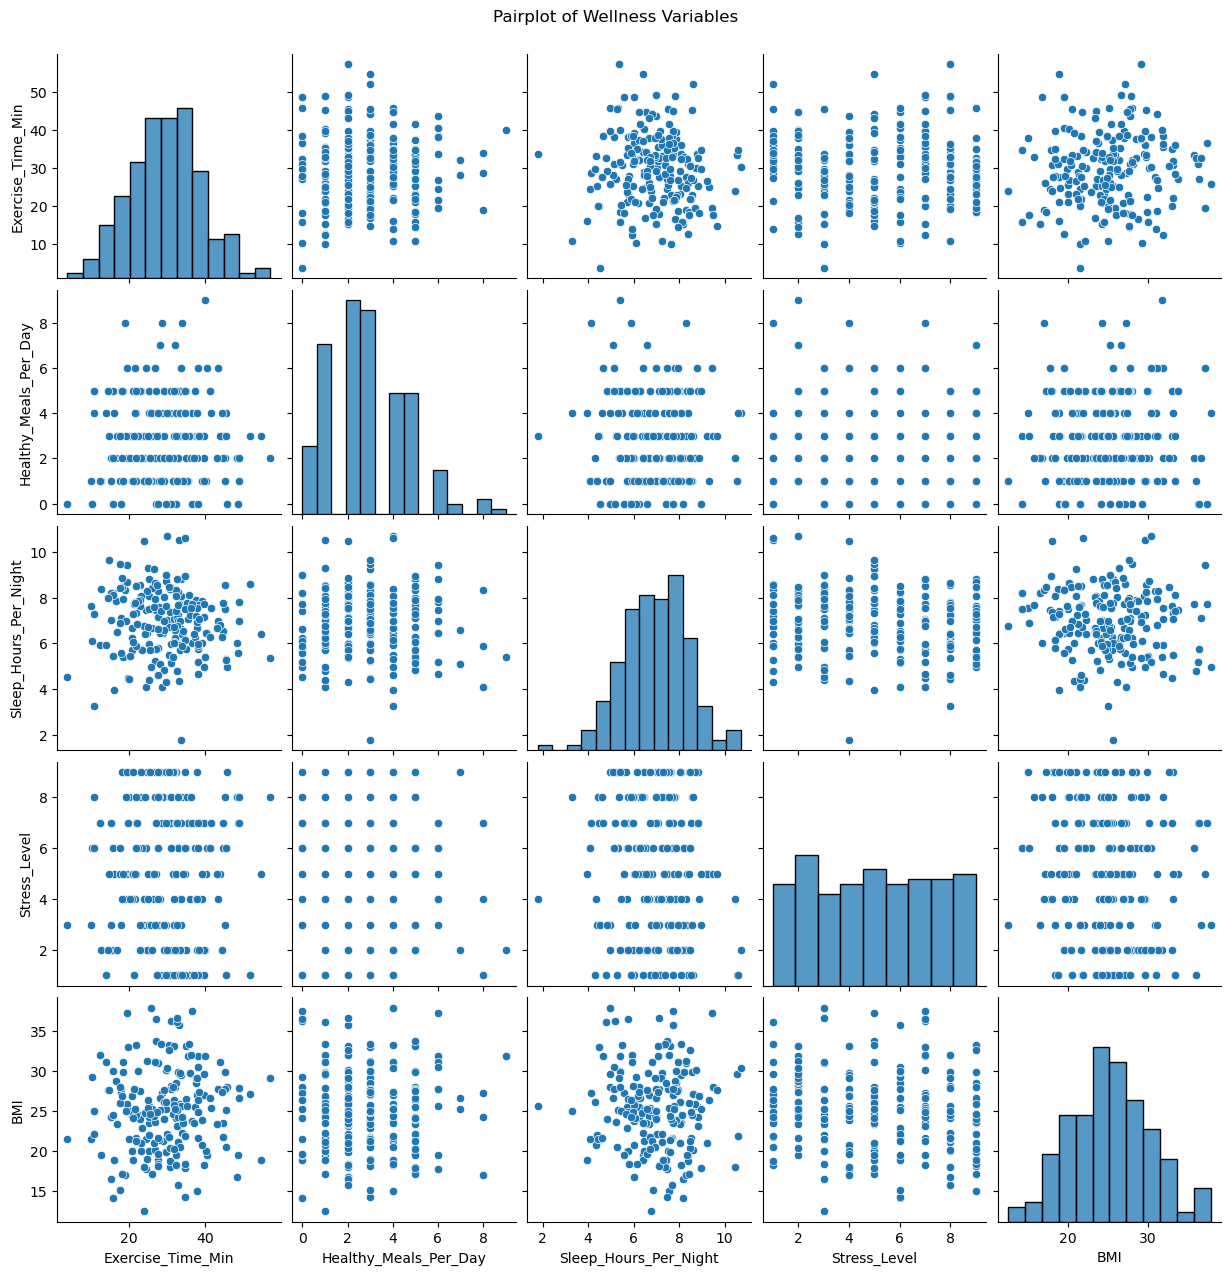

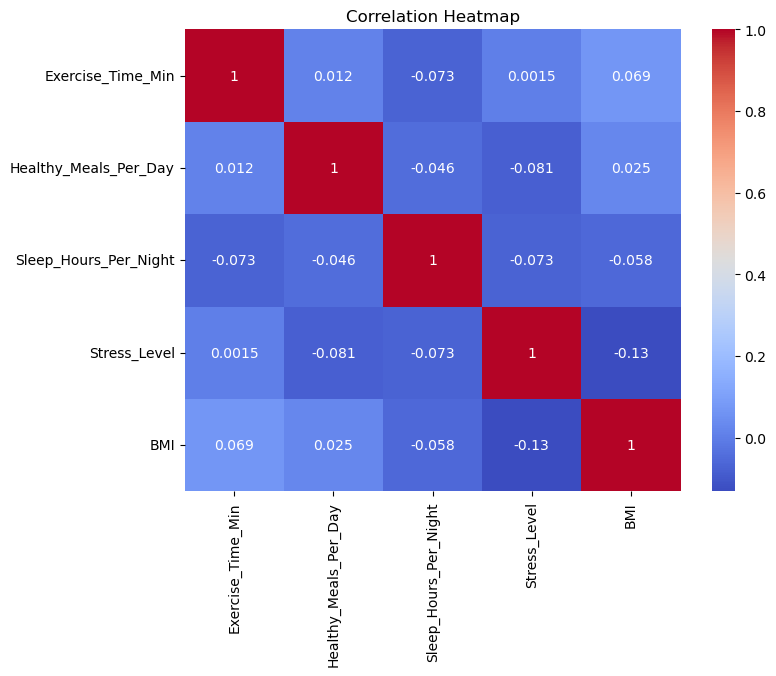

C:\Users\adnsk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\adnsk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\adnsk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\adnsk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

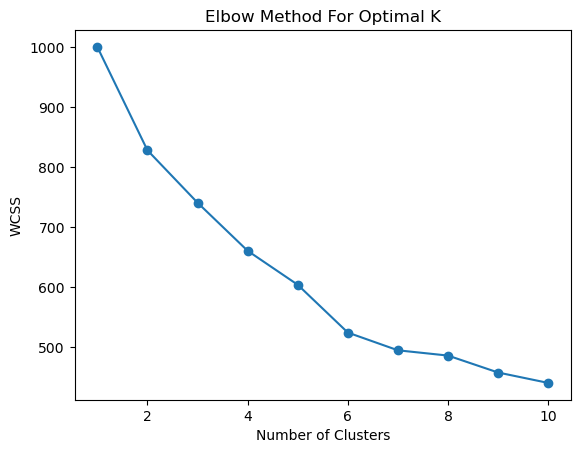

C:\Users\adnsk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Silhouette Score (KMeans): 0.1516159911787657


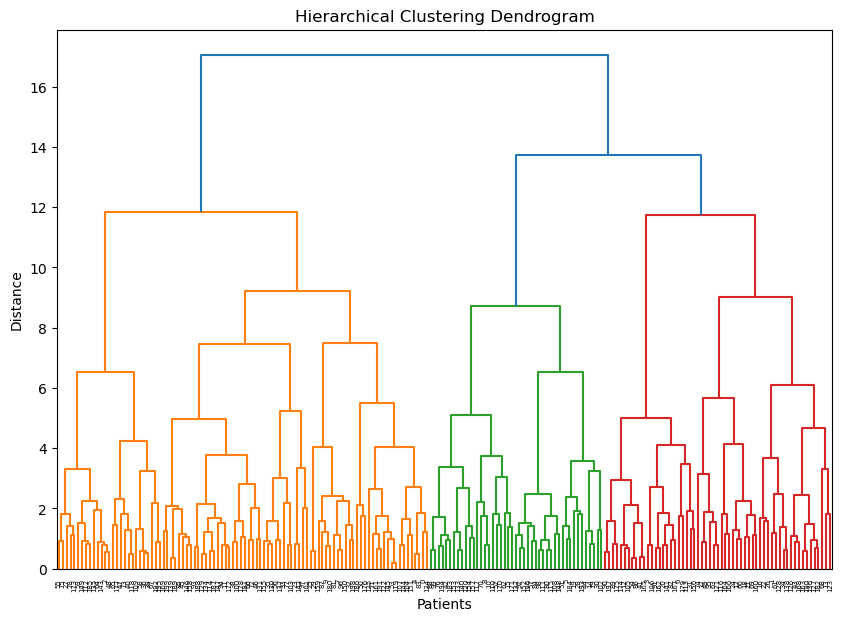

Silhouette Score (Hierarchical): 0.13628495765267165
Explained Variance Ratio: [0.23691549 0.22082517]
Silhouette Score (KMeans after PCA): 0.36256067182828666


C:\Users\adnsk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



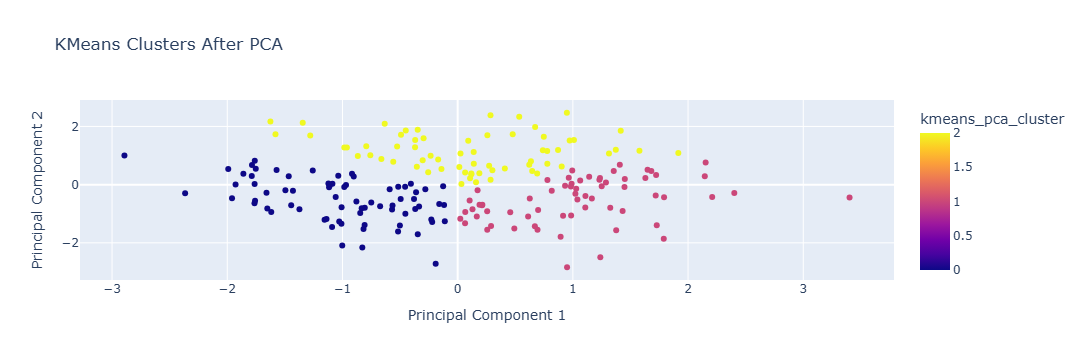


Cluster Means (Original Data):
                 Exercise_Time_Min  Healthy_Meals_Per_Day  \
kmeans_cluster                                             
0                       20.882706               1.704545   
1                       30.153795               3.414634   
2                       34.148754               2.972973   

                Sleep_Hours_Per_Night  Stress_Level        BMI  \
kmeans_cluster                                                   
0                            6.169744      5.136364  23.233885   
1                            7.385093      2.670732  27.124795   
2                            6.887434      7.486486  24.101048   

                hierarchical_cluster       PC1       PC2  kmeans_pca_cluster  
kmeans_cluster                                                                
0                           1.113636 -0.726257  0.007749            0.613636  
1                           0.121951  0.788823  0.695755            1.573171  
2                  

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
import plotly.express as px

file_path = r"C:\Users\adnsk\Desktop\health_wellness_data.csv"
df = pd.read_csv(file_path)

print("Shape:", df.shape)
print(df.head())
print(df.describe())
print(df.info())

sns.pairplot(df)
plt.suptitle("Pairplot of Wellness Variables", y=1.02)
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method For Optimal K")
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(scaled_data)
print("Silhouette Score (KMeans):", silhouette_score(scaled_data, df['kmeans_cluster']))

linked = linkage(scaled_data, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Patients")
plt.ylabel("Distance")
plt.show()

hc = AgglomerativeClustering(n_clusters=3)
df['hierarchical_cluster'] = hc.fit_predict(scaled_data)
print("Silhouette Score (Hierarchical):", silhouette_score(scaled_data, df['hierarchical_cluster']))

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
df['PC1'] = pca_data[:, 0]
df['PC2'] = pca_data[:, 1]

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

kmeans_pca = KMeans(n_clusters=3, random_state=42)
df['kmeans_pca_cluster'] = kmeans_pca.fit_predict(pca_data)
print("Silhouette Score (KMeans after PCA):", silhouette_score(pca_data, df['kmeans_pca_cluster']))

fig = px.scatter(df, x="PC1", y="PC2", color="kmeans_pca_cluster",
                 title="KMeans Clusters After PCA",
                 labels={"PC1": "Principal Component 1", "PC2": "Principal Component 2"})
fig.show()

print("\nCluster Means (Original Data):\n", df.groupby("kmeans_cluster").mean())
print("\nCluster Means (After PCA):\n", df.groupby("kmeans_pca_cluster").mean())
